In [17]:
# LAS LÍNEAS ESCRITAS DE ESTA MANERA CORRESPONDEN A COMENTARIOS DEL PROGRAMA,
# LEA CUIDADOSAMENTE LAS INDICACIONES PARA EJECUTAR LAS LINEAS DE COMANDO

# EJECUTE ESTA CELDA PARA CARGAR LAS LIBRERÍAS NECESARIAS PARA QUE EL CUADERNO FUNCIONE
# (oprima las teclas 'SHIFT + ENTER' o 'CTRL + ENTER')
#librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from root import *
#some stylish
plt.style.use('seaborn')
%matplotlib inline

In [3]:
# EJECUTE ESTA CELDA PARA CARGAR LOS AUDIOS
Fs, data = read('sonidos/mezcla1.wav')
senal_observada_1 = data
Fs, data = read('sonidos/mezcla2.wav')
senal_observada_2 = data
Fs, data = read('sonidos/mezcla3.wav')
senal_observada_3 = data
#ESTA LÍNEA GUARDA LOS DATOS DE LOS 3 AUDIOS EN UNA VARIABLE
senales_observadas = np.c_[senal_observada_1,senal_observada_2,senal_observada_3]

# La ingeniería detrás del sonido

Suponga que usted hace parte de un equipo de ingenieros, músicos y matemáticos que quieren desarrollar un software que identifique y separe instrumentos, voces y ruido de un audio.

Esta tarea se puede abordar de diferentes maneras y se requiere estudiar detalladamente el audio y la forma como diferentes sonidos se mezclan. Por ejemplo, una orquesta está formada por muchos músicos a quienes se les asigna diferentes instrumentos y partituras, a partir de esto, cunado todos tocan sus respectivos instrumentos al mismo tiempo se puede crear una obra de música clásica.

Pensemos en el proceso inverso, conociendo la obra de música, ¿será posible extraer el sonido de cada instrumento?

Actualmente ya hay software capaces de reconocer y extraer parte de los sonidos de una pieza musical y esto es justamente lo que quiere desarrollar el equipo al que usted pertenece.

## Fase exploratoria
![sonidos](img.jpg)

Para la fase exploratoria el equipo reunió a tres músicos (un violinista, un chelista y un flautista), los ubicó en diferentes posiciones en un estudio de grabación y colocó tres micrófonos en las paredes.

Se le pide a los músicos que interpretaran tres obras clásicas al mismo tiempo (cada músico una diferente), los tres micrófonos grabaron la mezcla de las tres interpretaciones musicales.

A continuación se presentan las grabaciones obtenidas. Note que cada audio es ligeramente diferente ¿por qué?

In [13]:
# EJECUTE ESTA CELDA PARA ESCUCHAR AUDIO 1
print('AUDIO 1')
Audio(senales_observadas.T[0], rate=Fs)

AUDIO 1


In [15]:
# EJECUTE ESTA CELDA PARA ESCUCHAR AUDIO 2
print('AUDIO 2')
Audio(senales_observadas.T[1], rate=Fs)

AUDIO 2


In [16]:
# EJECUTE ESTA CELDA PARA ESCUCHAR AUDIO 3
print('AUDIO 3')
Audio(senales_observadas.T[2], rate=Fs)

AUDIO 3


### Pregunta
¿Logra identificar qué está tocando cada músico?
¿Cómo se puede modelar la mezcla de los sonidos escuchados?

## Fase Alpha
Para encontrar y entender un modelo que represente las mezclas obtenidas por los micrófonos, su equipo decide trabajar con tonos puros y combinaciones de estos. La idea es explorar la mezcla de tonos puros y su modelamiento con el fin de identificar los parámetros y las variables del modelo.

Si el objetivo se logra, es de esperar que lo mismo se pueda hacer para la mezcla de la obras musicales...

El estudio de grabación se adecua para colocar tres parlantes que emiten tonos puros diferentes ($s_1$, $s_2$, $s_3$) y los tres microfonos de las paredes graban la mezcla de estos ($x_1$, $x_2$, $x_3$). A continuación se presenta las grabaciones obtenidas, note que cada audio ligeramente es diferente, ¿por qué?

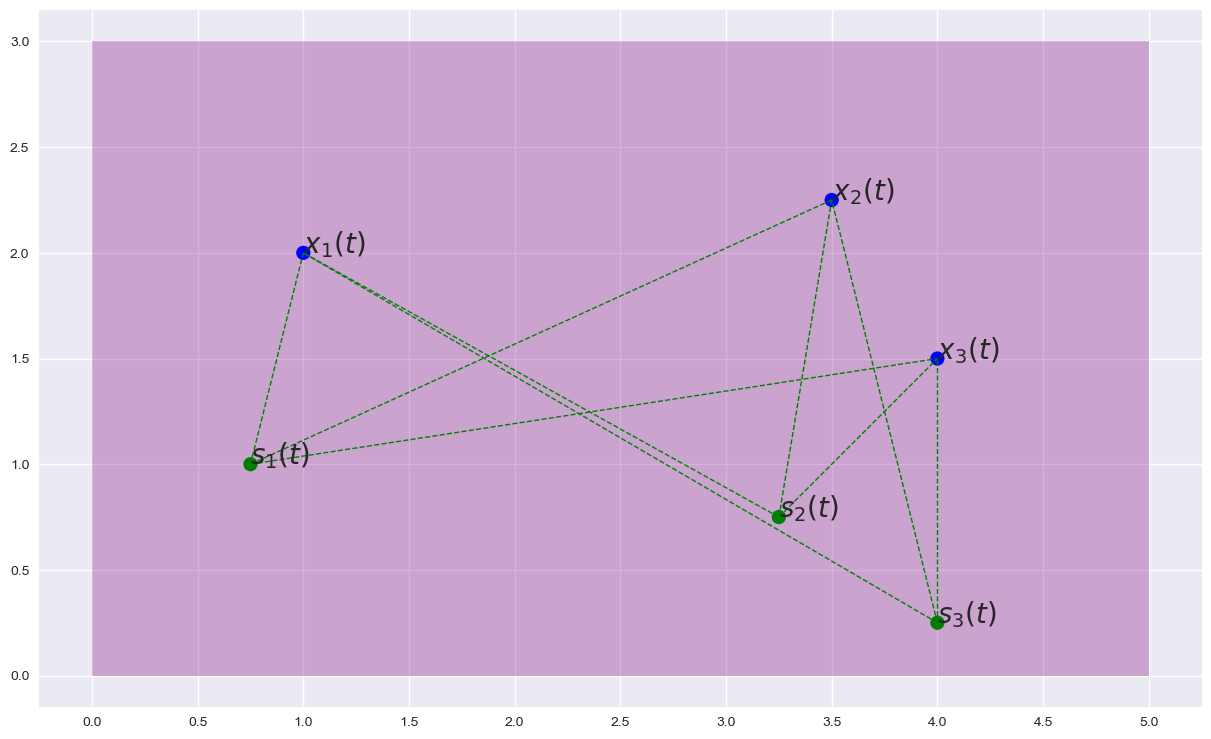

In [18]:
ut1 = [0.75,1] # CAMBIAR la ubicación de la fuente 1
ut2 = [3.25,0.75] # CAMBIAR la ubicación de la fuente 2
ut3 = [4,0.25] # CAMBIAR la ubicación de la fuente 3
um1 = [1,2] # CAMBIAR la ubicación del receptor 1
um2 = [3.5,2.25] # CAMBIAR la ubicación del receptor 2
um3 = [4,1.5] # CAMBIAR la ubicación del receptor 3
#------------------------------------------------------------------------
dt = [ut1, ut2, ut3, um1, um2, um3] # NO CAMBIAR esta celda
dtt = np.array([ut1, ut2, ut3]) # NO CAMBIAR esta celda
dtm = np.array([um1, um2, um3]) # NO CAMBIAR esta celda
A, signals_mixes = run_ubicaciones(dt, dtt, dtm) # NO CAMBIAR esta celda

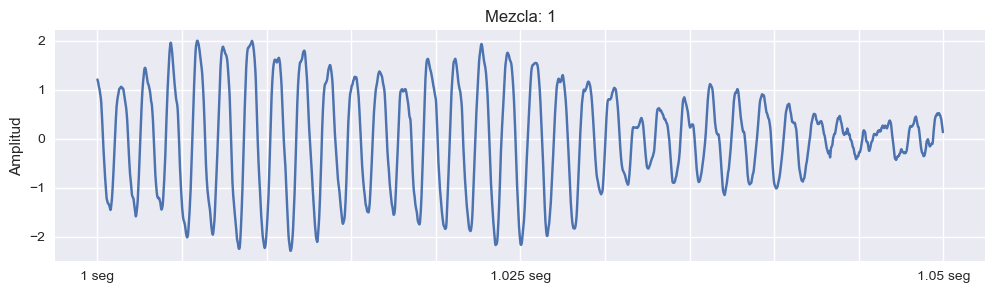

In [19]:
# EJECUTE ESTA CELDA PARA ESCUCHAR AUDIO 1
graf_s(signals_mixes, 1)

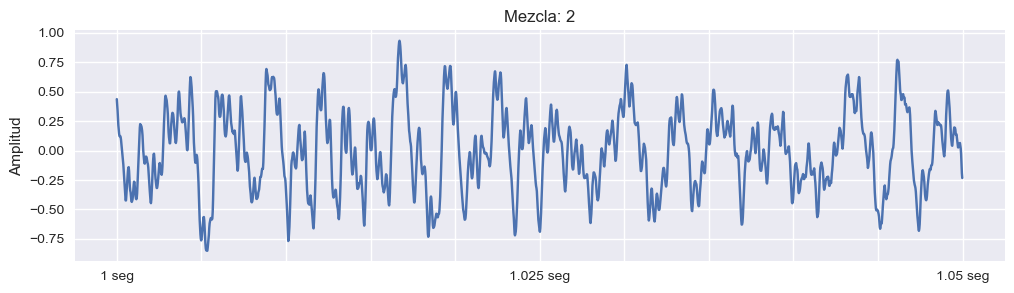

In [20]:
# EJECUTE ESTA CELDA PARA ESCUCHAR AUDIO 2
graf_s(signals_mixes, 2)

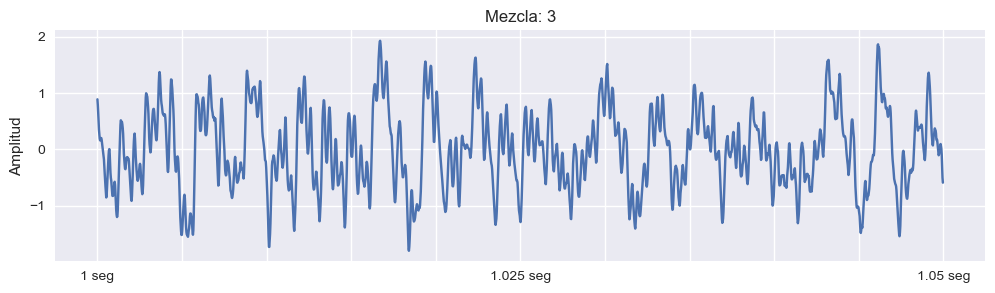

In [21]:
# EJECUTE ESTA CELDA PARA ESCUCHAR AUDIO 3
graf_s(signals_mixes,3)

### Pregunta
¿Cómo se puede modelar la mezcla de los tonos puros?